In [1]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data Set 1
gyms = ["Crunch", "Planet Fitness", "NY Sports Club", "Rickie's Gym"]
members = [49, 92, 84, 53]

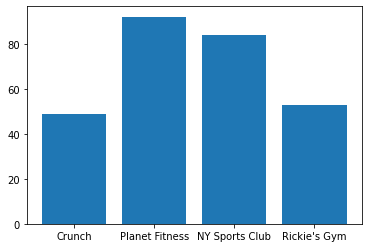

In [3]:
# Create a chart without annotations. 
chart_bar = plt.bar(height=members, x=gyms)
chart_bar;

In [4]:
# Data Set 2
seconds = [0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150]
coaster_speed = [0, 10, 15, 65, 75, 70, 60, 68, 55, 70, 70, 55, 50, 30, 10, 0]

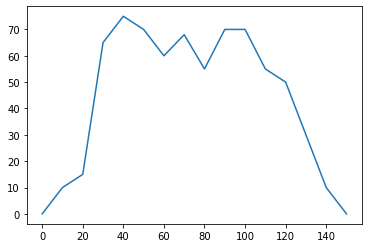

In [5]:
# Data Set 2 -  chart 
chart_line = plt.plot(seconds, coaster_speed)
chart_line;

In [6]:
# Data Set 3
mpg = [18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 
       14, 24, 22, 18, 21, 27, 26, 25, 24, 25, 26, 21, 10, 10, 11, 9]
horsepower = [130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 160, 150, 
              225, 95, 95, 97, 85,88, 46, 87, 90, 95, 113, 90, 215, 200, 210, 193]

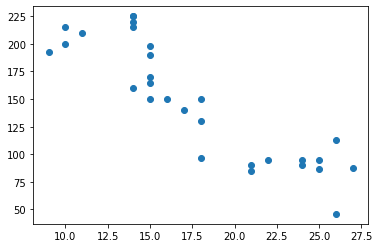

In [7]:
# Data Set 3 - chart 
chart_scatter = plt.scatter(x=mpg, y=horsepower)
chart_scatter;

In [8]:
cylinders  = [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, 4, 4, 4, 4, 4, 6, 8, 8, 8, 8]
cylinders_adj = [item * 10 for item in cylinders]

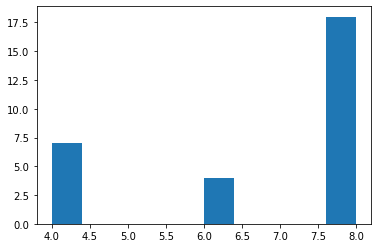

In [9]:
chart_hist = plt.hist(cylinders)
chart_hist;

### Bonus version
This is really just something I made for you to refer back to sometime in your future analytic endeavors!

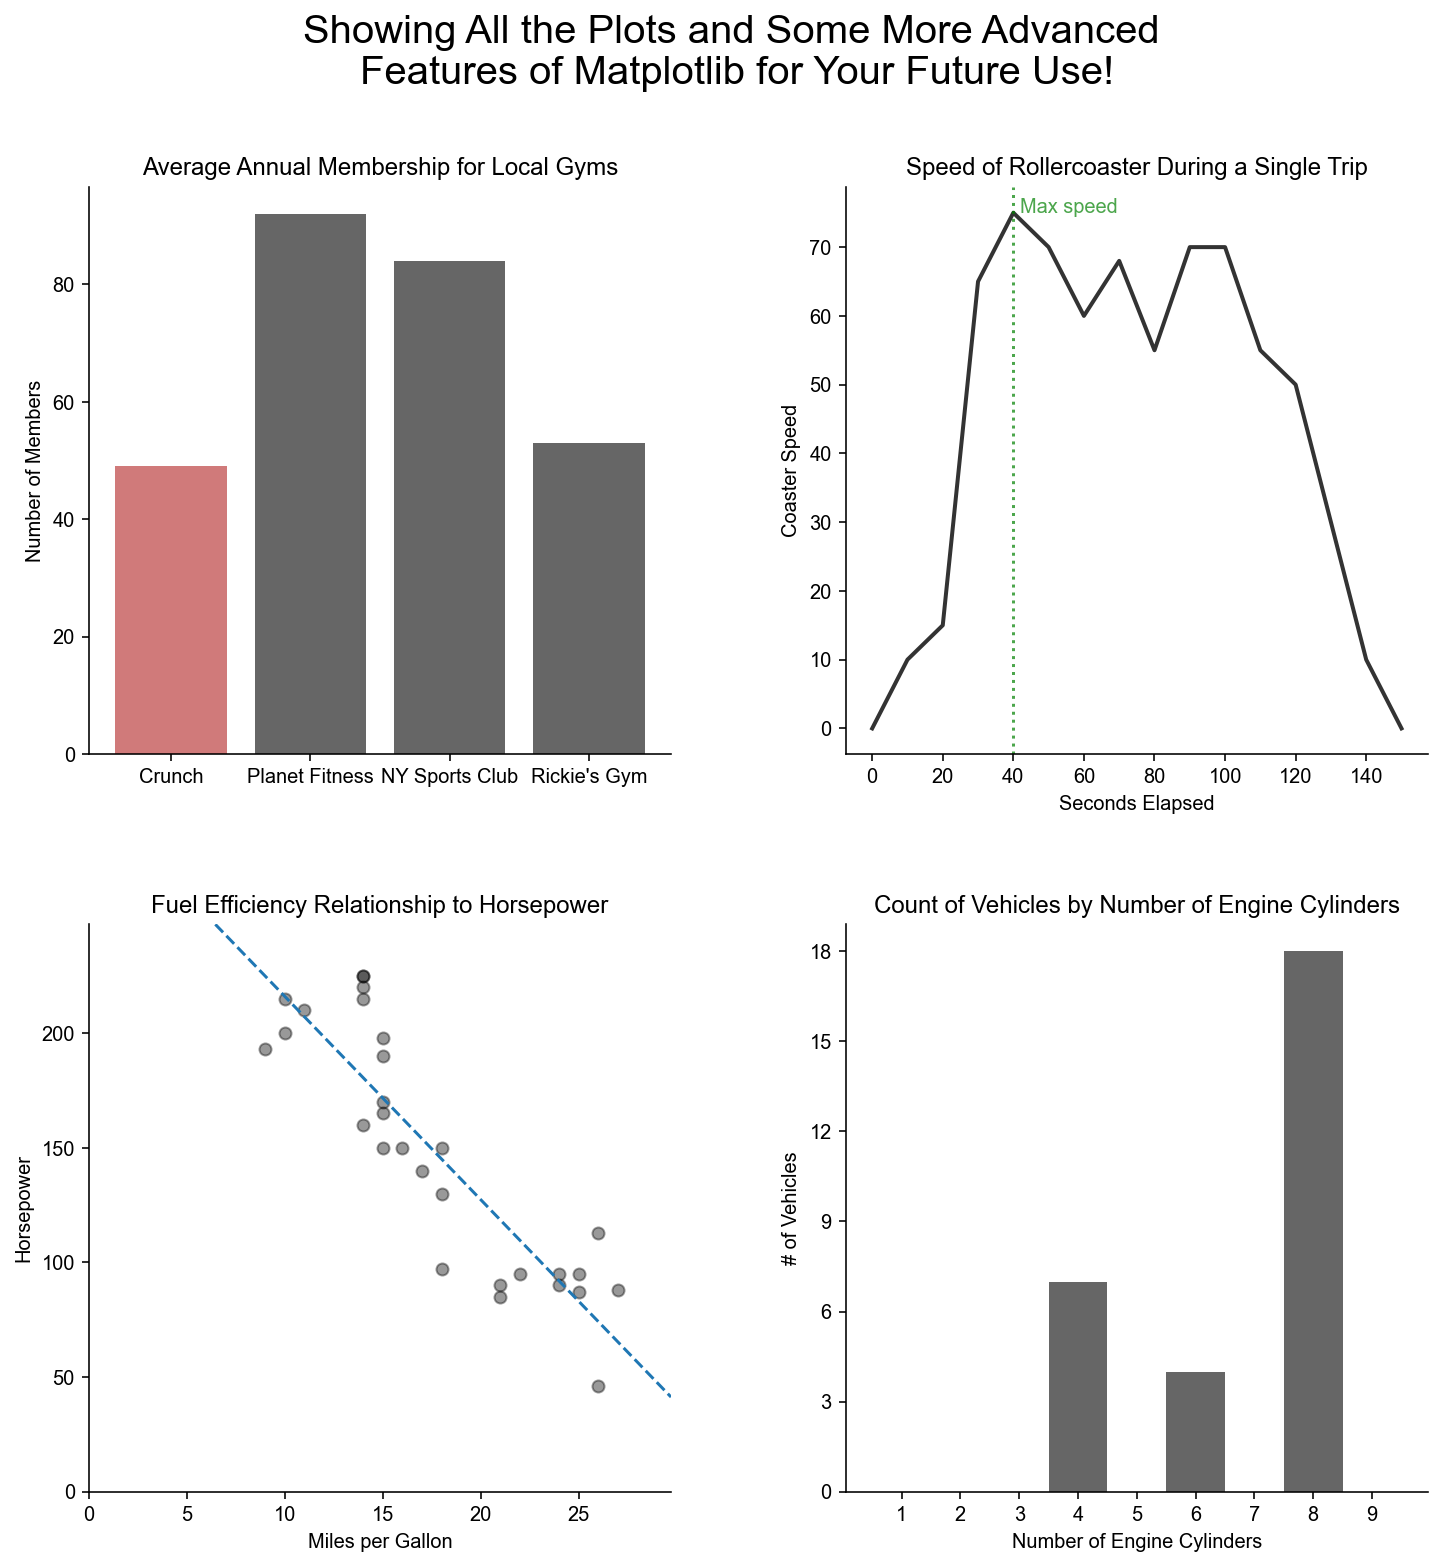

In [31]:
# And now, putting all the plots together for funsies.

# Setup stuff to make the plots prettier (the "retina" bit makes the output very sharp)
from matplotlib import rc
rc('font',**{'family':'sans-serif',
             'sans-serif':['Arial'],
             'size':10
            }
  )
%matplotlib inline
%config InlineBackend.figure_format='retina'


# Made some custom functions, since I'll be using these operations several times.
def kill_spines(subplot):
    subplot.spines['right'].set_visible(False)
    subplot.spines['top'].set_visible(False)
    
def label_and_title(ax, x_label=None, y_label=None, title=None):
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)
    if title is not None:
        ax.set_title(title)
    


# Here are the plots-------------------    
    
# ...start with subplots(), which returns two objects, which we call fig (figure) and ax (axis).
# ...the (2,2) parameter says it will contain 2 rows (of plots) and 2 columns (of plots), giving us a 2x2 square.
# ...figsize sets the overall size, which we're making 12 inches by 12 inches.
fig, ax = plt.subplots(2,2, figsize=(12,12))

# suptitle gives us a "super" title, meaning it is for the entire figure (outside the individual subplots)
plt.suptitle('Showing All the Plots and Some More Advanced \nFeatures of Matplotlib for Your Future Use!\n\n', fontsize=20)


# Bar chart
bar_colors = ['firebrick' if i==min(members) else 'k' for i in members]  # loop through members, if element is min, make it red
ax[0,0].bar(height=members, x=gyms, color=bar_colors, alpha=0.6)
label_and_title(ax[0,0], y_label='Number of Members', title='Average Annual Membership for Local Gyms')
#kill_spines(ax[0,0]) # we're running kill_spines at the end, but you could run it here, too.


# Line chart
max_speed = np.argmax(coaster_speed)        # argmax finds the position where the maximum is.
seconds_at_max_speed = seconds[max_speed]   # ...get that element from that position in the seconds variable!
ax[0,1].plot(seconds, coaster_speed, linewidth=2, color="#333")        
ax[0,1].axvline(seconds[np.argmax(coaster_speed)],  
                linestyle=":", color='g', alpha=0.7
               )  
ax[0,1].annotate('Max speed', (seconds_at_max_speed*1.05, np.max(coaster_speed)), color='g', alpha=0.7)
label_and_title(ax[0,1], x_label='Seconds Elapsed', y_label='Coaster Speed', title='Speed of Rollercoaster During a Single Trip')
#kill_spines(ax[0,1]) # we're running kill_spines at the end, but you could run it here, too.


# Scatter Plot
reg_slope, reg_intercept = np.polyfit(mpg, horsepower, 1)   # Making ourselves a quick best-fit line.  Numpy has a function for it.
reg_xy1 = (np.min(mpg), reg_intercept + reg_slope * np.min(mpg))
reg_xy2 = (np.max(mpg), reg_intercept + reg_slope * np.max(mpg))
ax[1,0].scatter(x=mpg, y=horsepower, color='k', alpha=0.4)
ax[1,0].set_xlim(0, np.max(mpg)*1.1)                       # By default, the x and y axes do not start at zero.
ax[1,0].set_ylim(0, np.max(horsepower)*1.1)                # This can provide a misleading distortion of the relationship.
ax[1,0].axline(reg_xy1, reg_xy2, linestyle='--')       # And here, we'll actually draw a line to represent that relationship.
label_and_title(ax[1,0], x_label='Miles per Gallon', y_label='Horsepower', title='Fuel Efficiency Relationship to Horsepower')
#kill_spines(ax[1,0]) # we're running kill_spines at the end, but you could run it here, too.


# Histogram
bins = np.arange(1, 11)  # Setting the bins is a better way to fix the x-axis span for a histogram than setting xlim.
ax[1,1].hist(cylinders, bins, 1, color='k', alpha=0.6)
ax[1,1].set_xticks(np.arange(1.5, 10.5), np.arange(1,10))  # fixing the binning behavior and setting the bars over the bin numbers
ax[1,1].set_yticks(np.arange(0, 21, 3))
label_and_title(ax[1,1], x_label='Number of Engine Cylinders', y_label='# of Vehicles', title = 'Count of Vehicles by Number of Engine Cylinders')
#kill_spines(ax[1,1]) # we're running kill_spines at the end, but you could run it here, too.


for axis in ax.flatten():  # This is a more compact way to run that kill_spines function.
    kill_spines(axis)      # ...axis is an array of lists---just flatten() it, loop through it, and run kill_spines() on each subplot.

# I thought it needed more space between subplots.  
# ...running plt.tight_layout() does something similar, but didn't give enough space, IMO.
# ...the wspace and hspace arguments are width and height space.
plt.subplots_adjust(wspace=0.3, hspace=0.3)